# Modelling on the Ad click data

## 1. Loading the saved data

In [1]:
#load the data from the csv file that we have saved.
import pandas as pd

data=pd.read_csv('train_data.csv')
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C17,C18,C19,C20,C21,device_ip_counts,device_id_counts,hour_of_day,day_of_week,hourly_user_count
0,10000679056417042096,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,2161,0,35,-1,157,6,4125387,0,Tuesday,104444
1,10002028568167339219,0,2014-10-21,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,...,2161,0,35,100148,157,1,4125387,0,Tuesday,104444
2,10004765361151096125,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1722,0,35,-1,79,8734,4125387,0,Tuesday,104444
3,10005609489911213467,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,...,2480,3,297,100111,61,1,173,0,Tuesday,104444
4,10006958186789044052,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,2161,0,35,100034,157,1,4125387,0,Tuesday,104444


### 1.1 Split the data into train and test data

* Here as we have the time stamps for the data we can perform time based splitting of the data.
* So let us have a look at how the data is given to us

In [2]:
data['hour']

0                   2014-10-21
1                   2014-10-21
2                   2014-10-21
3                   2014-10-21
4                   2014-10-21
                  ...         
4999995    2014-10-30 23:00:00
4999996    2014-10-30 23:00:00
4999997    2014-10-30 23:00:00
4999998    2014-10-30 23:00:00
4999999    2014-10-30 23:00:00
Name: hour, Length: 5000000, dtype: object

Here we can see that the data is already arranged according to the time stamps , so we can directly perform the train and test split.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test =train_test_split(data,test_size=0.2, shuffle=False)
X_train.head()


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C17,C18,C19,C20,C21,device_ip_counts,device_id_counts,hour_of_day,day_of_week,hourly_user_count
0,10000679056417042096,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,2161,0,35,-1,157,6,4125387,0,Tuesday,104444
1,10002028568167339219,0,2014-10-21,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,...,2161,0,35,100148,157,1,4125387,0,Tuesday,104444
2,10004765361151096125,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1722,0,35,-1,79,8734,4125387,0,Tuesday,104444
3,10005609489911213467,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,...,2480,3,297,100111,61,1,173,0,Tuesday,104444
4,10006958186789044052,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,2161,0,35,100034,157,1,4125387,0,Tuesday,104444


In [4]:
X_test.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,device_ip_counts,device_id_counts,hour_of_day,day_of_week,hourly_user_count
4000000,0,1005,1,cffc1324,bc63ea42,335d28a8,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,1,4125387,23,Tuesday,100975
4000001,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2616,0,35,-1,51,403,4125387,23,Tuesday,100975
4000002,1,1005,0,e9ca7d40,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2682,1,419,100084,212,1,4125387,23,Tuesday,100975
4000003,0,1005,1,85f751fd,c4e18dd6,50e219e0,cf0327f9,2347f47a,0f2161f8,29d6ac92,...,2681,1,419,-1,212,13,6,23,Tuesday,100975
4000004,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2545,0,167,-1,221,8,4125387,23,Tuesday,100975


In [44]:
test_2=X_test.drop(columns=['device_ip_counts','device_id_counts','hour_of_day','day_of_week','hourly_user_count'])
test_2.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
4000000,6453520313166270806,0,2014-10-28 23:00:00,1005,1,cffc1324,bc63ea42,335d28a8,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
4000001,6454009787605958372,0,2014-10-28 23:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,22676,320,50,2616,0,35,-1,51
4000002,6454036810724957598,1,2014-10-28 23:00:00,1005,0,e9ca7d40,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,23415,300,250,2682,1,419,100084,212
4000003,6454141531557669580,0,2014-10-28 23:00:00,1005,1,85f751fd,c4e18dd6,50e219e0,cf0327f9,2347f47a,...,1,0,23379,300,50,2681,1,419,-1,212
4000004,6457954033620459280,0,2014-10-28 23:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,22258,320,50,2545,0,167,-1,221


In [45]:
test_2.to_csv('final_test_data.csv',index=False)

Let us check the distributions of classes in train and test data

In [5]:
X_train['click'].value_counts()/X_train.shape[0]

0    0.828447
1    0.171553
Name: click, dtype: float64

In [6]:
X_test['click'].value_counts()/X_test.shape[0]

0    0.836411
1    0.163589
Name: click, dtype: float64

The distributions are similar hence they have not changed much and we can proceed further.

## 2. Data preparation

* Here if we notice almost all the features are categorical in nature we can use response coding with the CTR values itself which we have computed during the EDA for categorical features.
* We can perform column standardization as the 1st model that we are trying is Logistic regression which assumes that features in the dataset follow gaussian distribution.

### 2.1 Encoding of categorical features with their respective categorical CTR values

In [16]:
#functions to perform the response coding of the categorical features
from tqdm import tqdm

def response_fit(data,feature_name):
    '''
    fit function to encode the categorical variables with their respective CTR values
    '''
    #Here we will 1st group the data points in the dataframe with the help of group by and then count the number of impressions in each group
    #Here we can use groupby().count() but size() gives us the result in the form of a nice dataframe with multi-index
    #for plotting we need to convert the multi-index group by object  in to columns so with the help of unstack() we will seperate the 0-impressions and 1-clicks as 2 columns with elements as counts
    
    df_vocab=data.groupby([feature_name,'click']).size().unstack()
    # This dataframe contains the unique categorical values of the given feature as index and the impressions and clicks as 2 columns
    
    #Now compute the CTR values by using the CTR formula 
    #This is the formula for computing the click thropugh rate (CTR)= total number of clicks/ total number of impressions
    #Here total number of impressions = number of non-clicks+ no of clicks (0 column + 1 column )
    df_vocab['CTR']= df_vocab[1]/(df_vocab[0]+df_vocab[1])
    
    #drop the null values
    df_vocab.dropna(inplace=True)
    
    #compute the mean CTR to substitute CTR for those feature values which will not be found in the train data
    mean_CTR= df_vocab['CTR'].mean()
    
    #create a dictionary with keys= feature category names and values = respective CTR values
    keys=list(df_vocab.index)
    values=list(df_vocab['CTR'].values)
    vocab_dict= {keys[i]:values[i] for i in range(len(keys))}
    
    #return the vocab dictionary , so that it is used to transform train and test dataframes
    return vocab_dict,mean_CTR

def response_transform(x,vocab,mean_CTR):
    '''
    transform function to encode the categorical varibles with their respective CTR values
    '''
    vector=[] #to store the CTR for all the data points
    
    #loop thorugh all the data points of the given series or dataframe
    for row in x:
        #Check if it is present in the train data, otherwise add mean_CTR as the response vector
        vector.append(vocab.get(row,mean_CTR))
    
    #return the list containing the CTR values
    return vector
       

<b> 1st we will encode all the features in terms of their respective categorical CTR values </b>

In [8]:
#store all the names of the features in a list
#Here we are not inclusing the device id and device ip because we already have engineered features device id count and device ip count with CTR values
feature_names=['site_id','site_domain','site_category','app_id','app_category','app_domain',\
                'device_model','device_type','device_conn_type','device_id_counts','device_ip_counts',\
                'banner_pos','C1','C14','C15','C16','C17','C18','C19','C20','C21',\
                'hour_of_day','day_of_week','hourly_user_count']

#Data frame to store only CTR encoded values
X_train_pCTR=pd.DataFrame()
X_test_pCTR=pd.DataFrame()

#Loop thorough each column of the original dataframe for encoding them
for name in tqdm(feature_names):
    
    #first get the vocabulary dictionary and the mean CTR for use on unknown categories
    vocab,mean=response_fit(X_train,name) # fit has to happen only on train data

    #print the fit-status to the screen
    print('....Fitted on ', name ,' feature data.....')
    
    # we use the vocab to response code the train and test data
    X_train_pCTR[name] = response_transform(X_train[name],vocab,mean)
    X_test_pCTR[name] = response_transform(X_test[name],vocab,mean)
    
    #print the transform status to the screen
    print('....transformed on ', name ,' feature data.....')
    

  0%|          | 0/24 [00:00<?, ?it/s]

....Fitted on  site_id  feature data.....


  4%|▍         | 1/24 [00:01<00:45,  2.00s/it]

....transformed on  site_id  feature data.....
....Fitted on  site_domain  feature data.....


  8%|▊         | 2/24 [00:03<00:36,  1.65s/it]

....transformed on  site_domain  feature data.....
....Fitted on  site_category  feature data.....


 12%|█▎        | 3/24 [00:04<00:31,  1.50s/it]

....transformed on  site_category  feature data.....
....Fitted on  app_id  feature data.....


 17%|█▋        | 4/24 [00:06<00:28,  1.45s/it]

....transformed on  app_id  feature data.....
....Fitted on  app_category  feature data.....


 21%|██        | 5/24 [00:07<00:26,  1.40s/it]

....transformed on  app_category  feature data.....
....Fitted on  app_domain  feature data.....


 25%|██▌       | 6/24 [00:08<00:24,  1.38s/it]

....transformed on  app_domain  feature data.....
....Fitted on  device_model  feature data.....


 29%|██▉       | 7/24 [00:10<00:23,  1.40s/it]

....transformed on  device_model  feature data.....
....Fitted on  device_type  feature data.....


 33%|███▎      | 8/24 [00:11<00:21,  1.34s/it]

....transformed on  device_type  feature data.....
....Fitted on  device_conn_type  feature data.....


 38%|███▊      | 9/24 [00:12<00:19,  1.32s/it]

....transformed on  device_conn_type  feature data.....
....Fitted on  device_id_counts  feature data.....


 42%|████▏     | 10/24 [00:13<00:18,  1.31s/it]

....transformed on  device_id_counts  feature data.....
....Fitted on  device_ip_counts  feature data.....


 46%|████▌     | 11/24 [00:15<00:16,  1.29s/it]

....transformed on  device_ip_counts  feature data.....
....Fitted on  banner_pos  feature data.....


 50%|█████     | 12/24 [00:16<00:15,  1.27s/it]

....transformed on  banner_pos  feature data.....
....Fitted on  C1  feature data.....


 54%|█████▍    | 13/24 [00:17<00:14,  1.27s/it]

....transformed on  C1  feature data.....
....Fitted on  C14  feature data.....


 58%|█████▊    | 14/24 [00:19<00:12,  1.29s/it]

....transformed on  C14  feature data.....
....Fitted on  C15  feature data.....


 62%|██████▎   | 15/24 [00:20<00:11,  1.29s/it]

....transformed on  C15  feature data.....
....Fitted on  C16  feature data.....


 67%|██████▋   | 16/24 [00:21<00:10,  1.27s/it]

....transformed on  C16  feature data.....
....Fitted on  C17  feature data.....


 71%|███████   | 17/24 [00:22<00:08,  1.28s/it]

....transformed on  C17  feature data.....
....Fitted on  C18  feature data.....


 75%|███████▌  | 18/24 [00:24<00:07,  1.26s/it]

....transformed on  C18  feature data.....
....Fitted on  C19  feature data.....


 79%|███████▉  | 19/24 [00:25<00:06,  1.26s/it]

....transformed on  C19  feature data.....
....Fitted on  C20  feature data.....


 83%|████████▎ | 20/24 [00:26<00:05,  1.26s/it]

....transformed on  C20  feature data.....
....Fitted on  C21  feature data.....


 88%|████████▊ | 21/24 [00:27<00:03,  1.25s/it]

....transformed on  C21  feature data.....
....Fitted on  hour_of_day  feature data.....


 92%|█████████▏| 22/24 [00:28<00:02,  1.23s/it]

....transformed on  hour_of_day  feature data.....
....Fitted on  day_of_week  feature data.....


 96%|█████████▌| 23/24 [00:30<00:01,  1.25s/it]

....transformed on  day_of_week  feature data.....
....Fitted on  hourly_user_count  feature data.....


100%|██████████| 24/24 [00:31<00:00,  1.32s/it]

....transformed on  hourly_user_count  feature data.....


In [9]:
pd.isnull(X_test_pCTR).sum(axis=0)

site_id              0
site_domain          0
site_category        0
app_id               0
app_category         0
app_domain           0
device_model         0
device_type          0
device_conn_type     0
device_id_counts     0
device_ip_counts     0
banner_pos           0
C1                   0
C14                  0
C15                  0
C16                  0
C17                  0
C18                  0
C19                  0
C20                  0
C21                  0
hour_of_day          0
day_of_week          0
hourly_user_count    0
dtype: int64

In [10]:
X_train_pCTR.shape

(4000000, 24)

In [11]:
y_train=X_train['click']
y_test=X_test['click']

## 3. Modelling

### Some utility functions to compute the confusion matrix

In [8]:

# This function plots the confusion matrices given y_i, y_i_hat.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that row.
    #Here A is a recall matrix so divide by the actual number of classes.
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that column.
    #here we are creating a precision matrix hence we need to divide it by predicted class numbers.
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

### Building a random model for finding worst case log-loss since our metric is log-loss

Log loss on Test Data using Random Model 0.8857566613140824 
-----------x-------------
[[0.37922987 0.62077013]
 [0.53548972 0.46451028]
 [0.34443298 0.65556702]
 ...
 [0.35813809 0.64186191]
 [0.58464291 0.41535709]
 [0.66787834 0.33212166]] 
---------------x-------------
[1 0 1 ... 1 0 0]


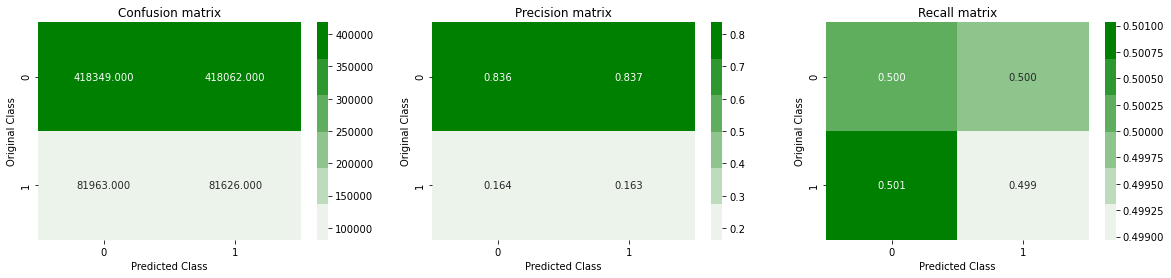

In [29]:
# we need to generate 2 numbers and the sum of numbers should be 1
# one solution is to genarate 2 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data

import numpy as np
from sklearn.metrics import log_loss

test_len= len(y_test);
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15),"\n-----------x-------------")
print(predicted_y,"\n---------------x-------------")

predicted_y =np.argmax(predicted_y, axis=1)
print(predicted_y)

plot_confusion_matrix(y_test, predicted_y)

###  <b> 3.1 Logistic regression with Hyper-parameter tuning </b>

For values of alpha =  1e-05 The log loss is: 0.40033751374967635
For values of alpha =  0.0001 The log loss is: 0.4005735275270094
For values of alpha =  0.001 The log loss is: 0.40511642373391454
For values of alpha =  0.01 The log loss is: 0.41109289204295196
For values of alpha =  0.1 The log loss is: 0.4124920763715693
For values of alpha =  1 The log loss is: 0.41286617269602427
For values of alpha =  10 The log loss is: 0.4134028144716175


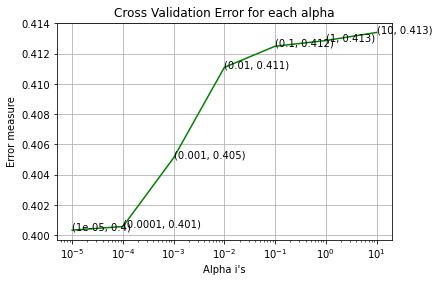

For values of best alpha =  1e-05 The train log loss is: 0.40548864976333626
For values of best alpha =  1e-05 The test log loss is: 0.40037213754677553
Total number of data points : 1000000


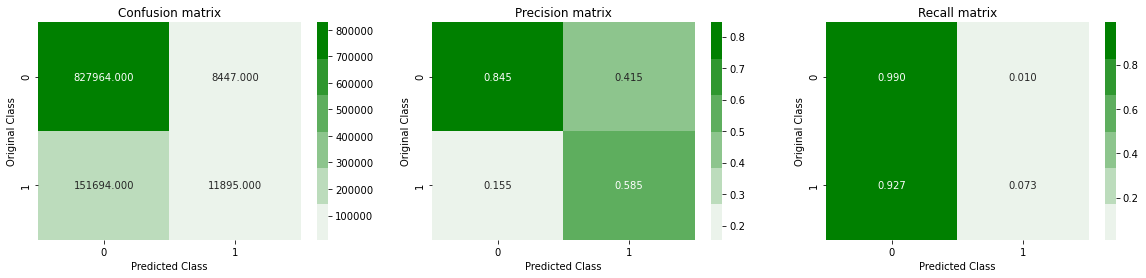

In [30]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42, class_weight= {0:1, 1:1.75})
    clf.fit(X_train_pCTR, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_pCTR, y_train)
    predict_y = sig_clf.predict_proba(X_test_pCTR)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
ax.set_xscale('log')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_pCTR, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_pCTR, y_train)

predict_y = sig_clf.predict_proba(X_train_pCTR)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_pCTR)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<b> Observations: </b>
* The test log-loss we got for Logistic Regression with hyper-parameter tuning is 0.40037 which is much better than the random model whose log-loss is at 0.8857
* Looking at the precision and recall matrices we can see that the model is predicting a lot of class 1 data points as class 0 data points but it is expected as this problem has class imbalance.
* let us see if we can improve the log-loss with the help of Gradient Boosted Decision Trees.

### <b> 3.2 XG-Boost with Hyper-parameter tuning </b>

In [31]:
from sklearn.metrics import log_loss, make_scorer
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

x_cfl=XGBClassifier(verbosity=0)

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}

#https://stackoverflow.com/questions/55892224/
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=1,n_jobs=-1,return_train_score=True,scoring=LogLoss)
random_cfl.fit(X_train_pCTR, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=0

In [32]:
results=pd.DataFrame.from_dict(random_cfl.cv_results_)

In [33]:
#get the best parameters and print them

best_depth = random_cfl.best_params_['max_depth']
best_learning_rate = random_cfl.best_params_['learning_rate']
best_subsample = random_cfl.best_params_['subsample']
best_n_estimators = random_cfl.best_params_['n_estimators']
best_colsample_bytree = random_cfl.best_params_['colsample_bytree']
best_test_log_loss=random_cfl.best_score_

print("best_depth =",best_depth)
print("best_learning_rate =",best_learning_rate)
print("best_subsample =",best_subsample)
print("best_n_estimators =",best_n_estimators)
print("best_colsample_bytree =",best_colsample_bytree)
print("best test log-loss =",best_test_log_loss)

best_depth = 5
best_learning_rate = 0.05
best_subsample = 0.3
best_n_estimators = 100
best_colsample_bytree = 0.5
best test log-loss = -0.40338834341184304


In [34]:
#fit the model with best paramters

Best_XGB = XGBClassifier(max_depth = 5,learning_rate=0.05, subsample= 0.3, n_estimators=100, colsample_bytree=0.5, verbosity =0)
Best_XGB.fit(X_train_pCTR,y_train)

y_train_pred=Best_XGB.predict_proba(X_train_pCTR)
y_test_pred=Best_XGB.predict_proba(X_test_pCTR)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [35]:
#print the log loss on train and test data

print ("The train log loss is:",log_loss(y_train,y_train_pred ))
print("The test log loss is:",log_loss(y_test, y_test_pred ))

The train log loss is: 0.39917676238224514
The test log loss is: 0.3945786002319781


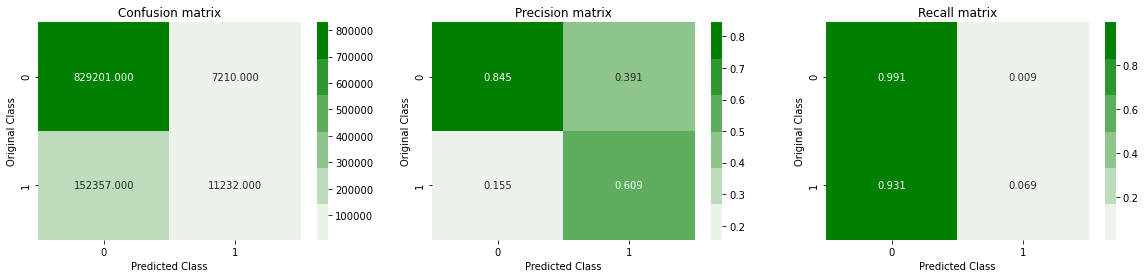

In [36]:
#plot the confusion matrix on the test data

plot_confusion_matrix(y_test,Best_XGB.predict(X_test_pCTR))

<b> Observations </b>
* The test log-loss for Gradien Boosted Decision trees with hyper-parameter tuning is <b> 0.39475 </b> which is a very good improvement from the previous loss of <b> 0.40037 </b> which we have got for Logistic regression. So this shows that non-linear models work well when compared to linear models for the given data.

### <b> 3.3 Field Aware Factorization Machines </b>

1st get the data in the required format

In [14]:
#we need to have the class label also in the dataframe to with default label ='click' as column name for training this model
#get the train data in that format
#Note that we need to add the label only for train data

X_train_pCTR['click']=y_train

In [38]:
#testing
from pyffm import PyFFM

training_params = {'epochs': 10, 'reg_lambda': 0.002, 'sigmoid':True, "parallel": True, 'early_stop': True}
pyffm = PyFFM(model='ffm', training_params=training_params)

pyffm.train(X_train_pCTR)

print("\n ---------completed training------------\n")

y_pred=pyffm.predict(X_test_pCTR)

print(" test log loss is :",log_loss(y_test, y_pred, eps=1e-15))


[2022-01-13 11:38:33,083.083] -     INFO: pyffm.pyffm -- Formatting dataframe
[2022-01-13 11:47:20,570.570] -     INFO: pyffm.engine.ffm_engine -- Creating ffm model with 24 fields and 5670 features.
[2022-01-13 11:47:20,590.590] -     INFO: pyffm.engine.ffm_engine -- Epoch 0
[2022-01-13 11:47:20,591.591] -     INFO: pyffm.engine.ffm_engine -- Training on 3600000 rows.
[2022-01-13 11:49:34,723.723] -     INFO: pyffm.engine.ffm_engine -- Full train done, took 134.1s
[2022-01-13 11:49:34,724.724] -     INFO: pyffm.engine.ffm_engine -- Calculating logloss
[2022-01-13 11:49:36,087.087] -     INFO: pyffm.engine.ffm_engine -- Logloss: 0.3887406679240388, 
Took 1.4s
[2022-01-13 11:49:36,087.087] -     INFO: pyffm.engine.ffm_engine -- Epoch 1
[2022-01-13 11:49:36,088.088] -     INFO: pyffm.engine.ffm_engine -- Training on 3600000 rows.
[2022-01-13 11:51:48,544.544] -     INFO: pyffm.engine.ffm_engine -- Full train done, took 132.5s
[2022-01-13 11:51:48,545.545] -     INFO: pyffm.engine.ffm_eng

In [16]:
y_pred=pyffm.predict(X_test_pCTR)

print(" test log loss is :",log_loss(y_test, y_pred, eps=1e-15))

[2022-01-13 20:12:23,404.404] -     INFO: pyffm.pyffm -- Formatting predict data
[2022-01-13 20:12:23,404.404] -     INFO: pyffm.pyffm -- Formatting dataframe
[2022-01-13 20:14:31,445.445] -     INFO: pyffm.engine.ffm_engine -- Batch predicting...
 test log loss is : 0.4497985213126


Now train the model with hyper-parameter tuning

In [19]:
from pyffm import PyFFM
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

#The only parameter here is the is the regularization Lambda so we will hyper-parameter tune wrt this values 
lamda=[0.00001,0.0001,0.001,0.01,0.1,10,100]

# Now train the model 
log_error_array=[]
for i in lamda:
    
    #set the parameters
    training_params = {'epochs': 10, 'reg_lambda': i, 'sigmoid':True, "parallel": True, 'early_stop': True}
    pyffm = PyFFM(model='ffm', training_params=training_params)
    
    #now train the model
    pyffm.train(X_train_pCTR)
    predict_y=pyffm.predict(X_test_pCTR)
    
    #save the log-loss in a list
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print("*-"*50)
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))


[2022-01-13 21:40:05,947.947] -     INFO: pyffm.pyffm -- Formatting dataframe
[2022-01-13 21:48:45,397.397] -     INFO: pyffm.engine.ffm_engine -- Creating ffm model with 24 fields and 5670 features.
[2022-01-13 21:48:45,403.403] -     INFO: pyffm.engine.ffm_engine -- Epoch 0
[2022-01-13 21:48:45,404.404] -     INFO: pyffm.engine.ffm_engine -- Training on 3600000 rows.
[2022-01-13 21:50:56,716.716] -     INFO: pyffm.engine.ffm_engine -- Full train done, took 131.3s
[2022-01-13 21:50:56,717.717] -     INFO: pyffm.engine.ffm_engine -- Calculating logloss
[2022-01-13 21:50:56,857.857] -     INFO: pyffm.engine.ffm_engine -- Logloss: 0.3897041822863188, 
Took 0.1s
[2022-01-13 21:50:56,857.857] -     INFO: pyffm.engine.ffm_engine -- Epoch 1
[2022-01-13 21:50:56,858.858] -     INFO: pyffm.engine.ffm_engine -- Training on 3600000 rows.
[2022-01-13 21:53:07,694.694] -     INFO: pyffm.engine.ffm_engine -- Full train done, took 130.8s
[2022-01-13 21:53:07,695.695] -     INFO: pyffm.engine.ffm_eng

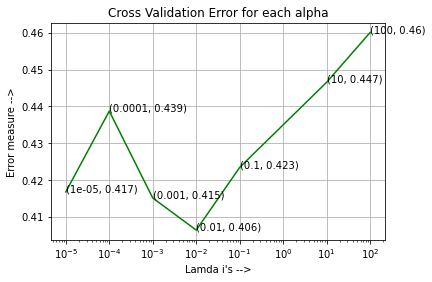

In [21]:
import numpy as np
#plot the log-loss for each lamda value
fig, ax = plt.subplots()
ax.plot(lamda, log_error_array,c='g')
ax.set_xscale('log')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((lamda[i],np.round(txt,3)), (lamda[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Lamda i's -->")
plt.ylabel("Error measure -->")
plt.show()

In [25]:
#train the model with best parameters
best_lamda = np.argmin(log_error_array)
training_params = {'epochs': 10, 'reg_lambda': best_lamda, 'sigmoid':True, "parallel": True, 'early_stop': True}
pyffm = PyFFM(model='ffm', training_params=training_params)
pyffm.train(X_train_pCTR)

#predict the model with best parameters
predict_y = pyffm.predict(X_train_pCTR)
print('For values of best alpha = ', lamda[best_lamda], "The train log loss is:",log_loss(y_train, predict_y, eps=1e-15))
predict_y = pyffm.predict(X_test_pCTR)
print('For values of best alpha = ', lamda[best_lamda], "The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

#get the class labels and print the total number of predicted points
print("Total number of data points :", len(predict_y))


[2022-01-14 11:33:02,774.774] -     INFO: pyffm.pyffm -- Formatting dataframe
[2022-01-14 11:41:48,316.316] -     INFO: pyffm.engine.ffm_engine -- Creating ffm model with 24 fields and 5670 features.
[2022-01-14 11:41:48,323.323] -     INFO: pyffm.engine.ffm_engine -- Epoch 0
[2022-01-14 11:41:48,324.324] -     INFO: pyffm.engine.ffm_engine -- Training on 3600000 rows.
[2022-01-14 11:44:00,068.068] -     INFO: pyffm.engine.ffm_engine -- Full train done, took 131.7s
[2022-01-14 11:44:00,068.068] -     INFO: pyffm.engine.ffm_engine -- Calculating logloss
[2022-01-14 11:44:00,205.205] -     INFO: pyffm.engine.ffm_engine -- Logloss: 0.42340242080525103, 
Took 0.1s
[2022-01-14 11:44:00,206.206] -     INFO: pyffm.engine.ffm_engine -- Epoch 1
[2022-01-14 11:44:00,206.206] -     INFO: pyffm.engine.ffm_engine -- Training on 3600000 rows.
[2022-01-14 11:46:10,908.908] -     INFO: pyffm.engine.ffm_engine -- Full train done, took 130.7s
[2022-01-14 11:46:10,909.909] -     INFO: pyffm.engine.ffm_en

In [32]:
predict_y_val=[1 if val>=0.15 else 0 for val in predict_y]

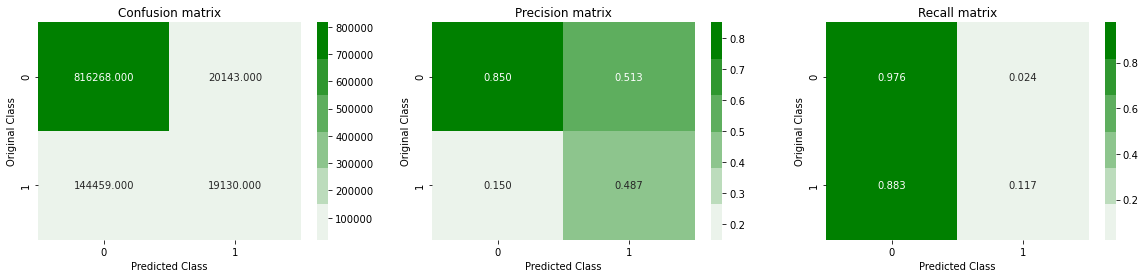

In [33]:
#plot the confusion matrix
plot_confusion_matrix(y_test, predict_y_val)

### Let us engineer a new feature which is GBDT features which are the number of the leaf node that is activated when we pass the data point to the tree after we have trained it.

In [ ]:
y_train.head()

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

#Here we are taking number of estimators as 100 and max depth as 5 as we have seen from the tuning of the GBDT in the above XGBoost model
gradient_boosting = GradientBoostingClassifier(n_estimators=100, max_depth=5)

#Here we will fit the GBDT on the train data and then trandform on both train and test data to get the GBDT features
history = gradient_boosting.fit(X_train_pCTR,y_train)

In [13]:
import pickle
#save the model to disk
with open('Model_for_GBDT_features.pkl', 'wb') as f:
    pickle.dump(gradient_boosting, f) 

In [14]:
#Now get the GBDT features by using the apply() attribute of the GBDT model

X_train_GBDT_features = gradient_boosting.apply(X_train_pCTR)
X_test_GBDT_features = gradient_boosting.apply(X_test_pCTR)

#print the shape the resulting features
X_train_GBDT_features.shape

(4000000, 100, 1)

We have got an array of shape (4000000,100,1) so in this basically each element is an array and each data point has got converted in to 100 dimensional vector which is basically leaf node number in each of the base estimators in the gradient Boosted tree.

In [15]:
#Here we need to reshape our array to a 2D array and then convert to a data frame to be used for modelling

X_train_GBDT_features=X_train_GBDT_features.reshape(4000000,100)
X_test_GBDT_features=X_test_GBDT_features.reshape(1000000,100)

#give names to the features so that we can analyse the feature importances if needed
GBDT_names=[]
for i in range(100):
    GBDT_names.append('GBDT_'+str(i))
    
#Add the GBDT features to the existing dataframe
for i in tqdm(range(100)):
    X_train_pCTR[GBDT_names[i]]=X_train_GBDT_features[:,i]
    X_test_pCTR[GBDT_names[i]]=X_test_GBDT_features[:,i]

X_train_pCTR.head()

100%|██████████| 100/100 [00:14<00:00,  7.07it/s]


,site_id,site_domain,site_category,app_id,app_category,app_domain,device_model,device_type,device_conn_type,device_id_counts,...,GBDT_90,GBDT_91,GBDT_92,GBDT_93,GBDT_94,GBDT_95,GBDT_96,GBDT_97,GBDT_98,GBDT_99
0,0.049802,0.049802,0.060520,0.200370,0.200891,0.196533,0.267520,0.171072,0.182705,0.175420,...,5.0,30.0,46.0,20.0,52.0,5.0,62.0,5.0,39.0,51.0
1,0.038837,0.038837,0.179733,0.200370,0.200891,0.196533,0.135048,0.171072,0.142270,0.175420,...,5.0,30.0,36.0,20.0,52.0,5.0,5.0,36.0,39.0,36.0
2,0.208994,0.208994,0.211487,0.200370,0.200891,0.196533,0.208030,0.171072,0.182705,0.175420,...,31.0,53.0,36.0,20.0,52.0,28.0,5.0,8.0,43.0,61.0
3,0.117400,0.121059,0.127780,0.129458,0.109826,0.132815,0.247619,0.171072,0.182705,0.079365,...,5.0,30.0,43.0,20.0,52.0,5.0,23.0,8.0,39.0,51.0
4,0.117400,0.121059,0.127780,0.196304,0.215531,0.196304,0.136166,0.171072,0.182705,0.175420,...,5.0,30.0,36.0,20.0,52.0,5.0,5.0,36.0,39.0,36.0


Save the GBDT features to csv file for later use

In [16]:
#save the X to the csv file for later use
X_train_pCTR.to_csv('train_data_GBDT.csv',index=False)
X_test_pCTR.to_csv('test_data_GBDT.csv',index=False)

#save the Y labels to csv files for later use
y_train.to_csv('train_labels.csv',index=False)
y_test.to_csv('test_labels.csv',index=False)

Load the new data with GBDT features from the csv files that we have saved

In [14]:
#read the train data from the csv files
import pandas as pd
X_train_pCTR=pd.read_csv('train_data_GBDT.csv')
X_test_pCTR=pd.read_csv('test_data_GBDT.csv')

#read the y_labels from the saved csv files
y_train=pd.read_csv('train_labels.csv')
y_test=pd.read_csv("test_labels.csv")

#Have a look for clarity if anything is missing etc
X_train_pCTR.head()

,site_id,site_domain,site_category,app_id,app_category,app_domain,device_model,device_type,device_conn_type,device_id_counts,...,GBDT_90,GBDT_91,GBDT_92,GBDT_93,GBDT_94,GBDT_95,GBDT_96,GBDT_97,GBDT_98,GBDT_99
0,0.049802,0.049802,0.060520,0.200370,0.200891,0.196533,0.267520,0.171072,0.182705,0.175420,...,5.0,30.0,46.0,20.0,52.0,5.0,62.0,5.0,39.0,51.0
1,0.038837,0.038837,0.179733,0.200370,0.200891,0.196533,0.135048,0.171072,0.142270,0.175420,...,5.0,30.0,36.0,20.0,52.0,5.0,5.0,36.0,39.0,36.0
2,0.208994,0.208994,0.211487,0.200370,0.200891,0.196533,0.208030,0.171072,0.182705,0.175420,...,31.0,53.0,36.0,20.0,52.0,28.0,5.0,8.0,43.0,61.0
3,0.117400,0.121059,0.127780,0.129458,0.109826,0.132815,0.247619,0.171072,0.182705,0.079365,...,5.0,30.0,43.0,20.0,52.0,5.0,23.0,8.0,39.0,51.0
4,0.117400,0.121059,0.127780,0.196304,0.215531,0.196304,0.136166,0.171072,0.182705,0.175420,...,5.0,30.0,36.0,20.0,52.0,5.0,5.0,36.0,39.0,36.0


### Let us see if these additional features are useful by training a logistic regression model with hyper parameter tuning

### <b>3.4 Logistic Regression with hyper parameter tuning with GBDT features</b>

For values of alpha =  1e-05 The log loss is: 0.43000541775832163
For values of alpha =  0.0001 The log loss is: 0.41403241623175313
For values of alpha =  0.001 The log loss is: 0.40012504902064616
For values of alpha =  0.01 The log loss is: 0.3959155830968275
For values of alpha =  0.1 The log loss is: 0.3964831461625865
For values of alpha =  1 The log loss is: 0.3969948667916074
For values of alpha =  10 The log loss is: 0.3989531631023348


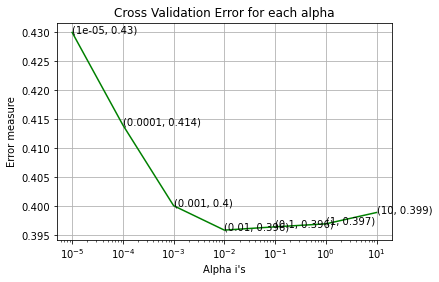

For values of best alpha =  0.01 The train log loss is: 0.4015931633406227
For values of best alpha =  0.01 The test log loss is: 0.3966036414582207
Total number of data points : 1000000


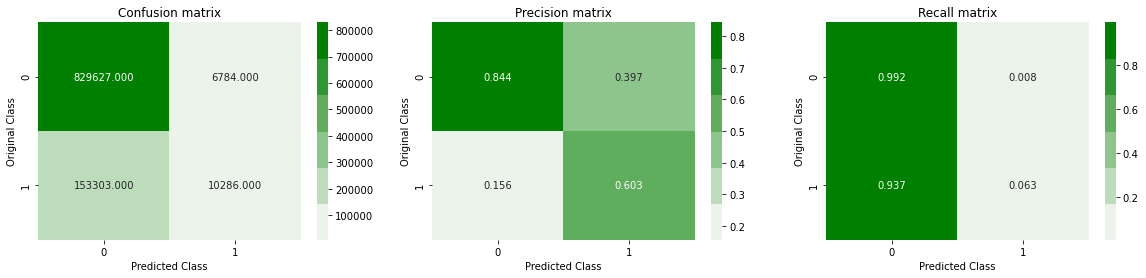

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
from sklearn.metrics import log_loss

alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42, class_weight= {0:1, 1:1.75})
    clf.fit(X_train_pCTR, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid",n_jobs=-1)
    sig_clf.fit(X_train_pCTR, y_train)
    predict_y = sig_clf.predict_proba(X_test_pCTR)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
ax.set_xscale('log')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42, n_jobs=-1)
clf.fit(X_train_pCTR, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_pCTR, y_train)

predict_y = sig_clf.predict_proba(X_train_pCTR)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_pCTR)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<b> Observations </b>
* Here we can see that we have improved the log-loss to <b>0.3966</b> with GBDT features which is a good improvement from the 0.4 which we have gotten from logistic regression without GBDT features.
* Hence we can observe that GBDT features have been definetely useful for us in prediction and we can see the slight improvement in the precesion value of class 1 from 0.59 to 0.603 although the it is small , it is still a good improvement which is very beneficial to us.
* As these features look promising because they gave good result with the Logistic regression , so we can expect good results by using non-linear model like GBDT's as well.

### <b> 3.5 XG-Boost with Hyper-parameter tuning of 2 parameters with GBDT features</b>

Here as we are dealing with huge amount of data , we need to train the model in batches , but there is no implementaton for batch training and hyper-paramter tuning, so we need to write our own code for hyper-parameter tuning in batches.

In [19]:
from sklearn.metrics import log_loss
from xgboost import XGBClassifier as xgb
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#first define the parameters to train
n_estimators = [50,100,200,500]
max_depth =[3,5,10]

#we will set the batch_size to 0.5 million data points
batch_size = 500000
epochs = 20

log_error=[]
param_combination=[]
for n_est in n_estimators:
    for depth in max_depth:
        model = xgb(objective='binary:logistic',n_estimators=n_est,max_depth=depth,verbosity=0,use_label_encoder=False)
        best_log_loss=0.5
        for i in range(epochs):
            for start in range(0, X_train_pCTR.shape[0], batch_size):
                if i==0:
                    model.fit(X_train_pCTR[start:start+batch_size], y_train[start:start+batch_size])
                else:
                    model.fit(X_train_pCTR[start:start+batch_size], y_train[start:start+batch_size].values,xgb_model=model.get_booster())   
            y_test_pred=model.predict_proba(X_test_pCTR)
            log_loss_val = log_loss(y_test, y_test_pred)
            print("The test log loss at epoch ",i," is:",log_loss_val)
            if log_loss_val<best_log_loss:
                best_log_loss=log_loss_val
            else:
                print("early stopping because test log_loss is found to be increasing")
                break
        log_error.append(log_loss_val)
        param_combination.append([n_est,depth])
        print("\n test log-loss for combination [n_estimators,max-depth] = [",n_est,',',depth,'] is ', log_loss_val)
        print("*="*50)

The test log loss at epoch  0  is: 0.39401092563803913
The test log loss at epoch  1  is: 0.39421685094353837
early stopping because test log_loss is found to be increasing

 test log-loss for combination [n_estimators,max-depth] = [ 50 , 3 ] is  0.39421685094353837
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
The test log loss at epoch  0  is: 0.39306598912722296
The test log loss at epoch  1  is: 0.39876263053268646
early stopping because test log_loss is found to be increasing

 test log-loss for combination [n_estimators,max-depth] = [ 50 , 5 ] is  0.39876263053268646
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
The test log loss at epoch  0  is: 0.39753740753138767
The test log loss at epoch  1  is: 0.43825345308944397
early stopping because test log_loss is found to be increasing

 test log-loss for combination [n_estimators,max-depth] = [ 50 , 10 ] is  0.43825345308944

From the above logs we can see that we have gotten the best test log-loss of 0.393065 at max-depth = 3 and n_estimators = 100, so we will train the model with these best parameters and the check the confusion matrix

In [24]:
model = xgb(objective='binary:logistic',n_estimators=100,max_depth=3,verbosity=0,use_label_encoder=False)
batch_size = 1000000
for start in range(0, X_train_pCTR.shape[0], batch_size):
    if start==0:
        model.fit(X_train_pCTR[start:start+batch_size], y_train[start:start+batch_size])
    else:
        model.fit(X_train_pCTR[start:start+batch_size], y_train[start:start+batch_size].values,xgb_model=model.get_booster())   
y_test_pred=model.predict_proba(X_test_pCTR)
log_loss_val = log_loss(y_test, y_test_pred)
print("The test log loss for best model is:",log_loss_val)

The test log loss for best model is: 0.3936609170093267


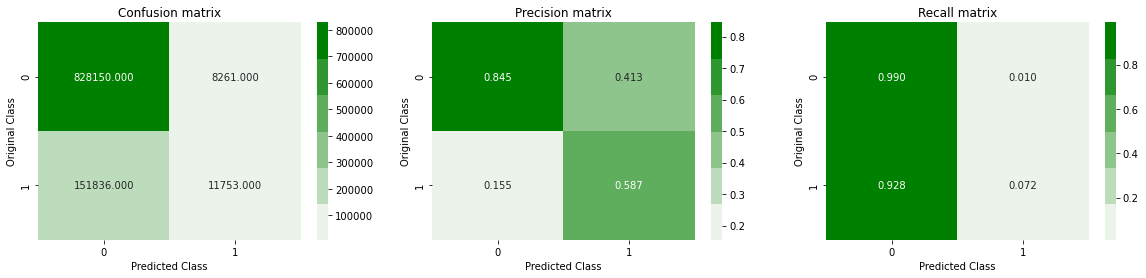

In [25]:
#plot the confusion matrix on the test data

plot_confusion_matrix(y_test,model.predict(X_test_pCTR))

<b> Observations </b>
* Here we are able to get a better log-loss with GBDT features and with XG-Bosst and we got a best log-loss till now which is better than the 
* Here we are able to reduce the log-loss by 0.001 by tuning just 2 parameters , so we will try to tune all the parameters and check if we could further improve the results.

### <b> 3.6 XG-Boost with Hyper-parameter tuning of all the parameters with GBDT features </b>

Here as we are dealing with huge amount of data , we need to train the model in batches , but there is no implementaton for batch training and hyper-paramter tuning, so we need to write our own code for hyper-parameter tuning in batches.

In [27]:
from sklearn.metrics import log_loss
from xgboost import XGBClassifier as xgb
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#first define the parameters to train
n_estimators = [50,100,200]
max_depth =[3,5,10]
colsample_bytree=[0.1,0.3,0.5,1]
subsample=[0.1,0.3,0.5,1]

#we will set the batch_size to 0.5 million data points
batch_size = 500000

log_error=[]
param_combination=[]
for n_est in n_estimators:
    for depth in max_depth:
        for col_samp in colsample_bytree:
            for sub_samp in subsample:
                model = xgb(objective='binary:logistic',verbosity=0,use_label_encoder=False,
                            n_estimators=n_est,max_depth=depth, learning_rate=0.01,colsample_bytree=col_samp,subsample=sub_samp)
                for start in range(0, X_train_pCTR.shape[0], batch_size):
                    if start==0:
                        model.fit(X_train_pCTR[start:start+batch_size], y_train[start:start+batch_size])
                    else:
                        model.fit(X_train_pCTR[start:start+batch_size], y_train[start:start+batch_size].values,xgb_model=model.get_booster())   
                y_test_pred=model.predict_proba(X_test_pCTR)
                log_loss_val = log_loss(y_test, y_test_pred)
                log_error.append(log_loss_val)
                param_combination.append([n_est,depth,col_samp,sub_samp])
                print("\n test log-loss for combination [n_estimators,max-depth,colsample_bytree,subsample] = ["
                        ,n_est,',',depth,',',col_samp,',',sub_samp,'] is ', log_loss_val)
                print("*="*50)


 test log-loss for combination [n_estimators,max-depth,colsample_bytree,subsample] = [ 50 , 3 , 0.1 , 0.1 ] is  0.3965112676050477
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

 test log-loss for combination [n_estimators,max-depth,colsample_bytree,subsample] = [ 50 , 3 , 0.1 , 0.3 ] is  0.39659621595392563
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

 test log-loss for combination [n_estimators,max-depth,colsample_bytree,subsample] = [ 50 , 3 , 0.1 , 0.5 ] is  0.3966114402857404
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

 test log-loss for combination [n_estimators,max-depth,colsample_bytree,subsample] = [ 50 , 3 , 0.1 , 1 ] is  0.39669010607319327
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

 test log-loss for combination [n_estimators,max-depth,colsample_by

Find the best combination by choosing the parameters which give the least validation log-loss

In [28]:
best_index=np.argmin(log_error)
best_params = param_combination[best_index]

print("We got a least log-loss of ",log_error[best_index],
      ' for the combination of [n_estimators,max-depth,colsample_bytree,subsample] =',best_params)

We got a least log-loss of  0.3906587749887899  for the combination of [n_estimators,max-depth,colsample_bytree,subsample] = [200, 10, 0.1, 0.5]


From the above logs we can see that we have gotten the best test log-loss of 0.390658 at max-depth = 10, n_estimators = 200, col_saamplebytree =0.1 and subsample=0.5. So, we will train the model with these best parameters to get the best model and the check the confusion matrix.

In [15]:
from sklearn.metrics import log_loss
from xgboost import XGBClassifier as xgb
import numpy as np
import warnings
warnings.filterwarnings("ignore")

model = xgb(objective='binary:logistic',verbosity=0,use_label_encoder=False,
                                n_estimators=200,max_depth=10, learning_rate=0.01,colsample_bytree=0.1,subsample=0.5)
batch_size = 500000
for start in range(0, X_train_pCTR.shape[0], batch_size):
    if start==0:
        model.fit(X_train_pCTR[start:start+batch_size], y_train[start:start+batch_size])
    else:
        model.fit(X_train_pCTR[start:start+batch_size], y_train[start:start+batch_size].values,xgb_model=model.get_booster())   
y_test_pred=model.predict_proba(X_test_pCTR)
log_loss_val = log_loss(y_test, y_test_pred)
print("The test log loss for best model is:",log_loss_val)

The test log loss for best model is: 0.3906587749887899


In [16]:
import pickle

#save the best model for later use
with open('XGB_model.pkl', 'wb') as f:
    pickle.dump(model, f) 

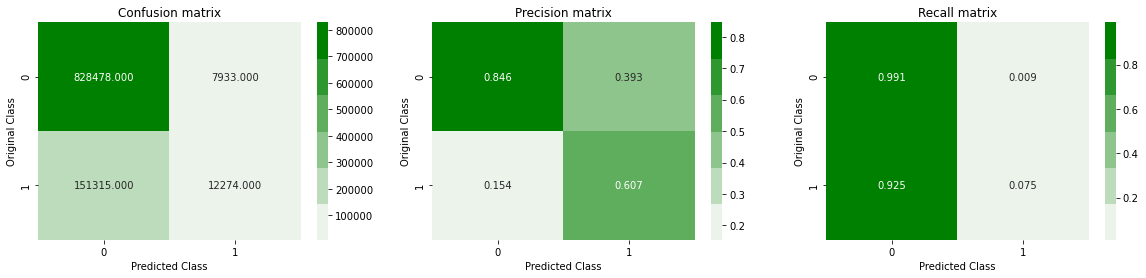

In [30]:
#plot the confusion matrix on the test data

plot_confusion_matrix(y_test,model.predict(X_test_pCTR))

<b> Observations </b>
* Here we are able to get a better log-loss with GBDT features and with XG-Boost and we got a best log-loss of <b>0.39065</b> till now which is better than the previous log-loss with tuning only 2 features where we have got <b>0.393065</b>.
* Here we are able to reduce the log-loss by 0.003 by tuning just 4 parameters which is a significant improvement, this change is also reflected in the results of the confusion matrix where we are able to increase the precision of the class 1 to <b>0.607</b> which is an improvement from <b>0.587</b> and there is not that significant improvement in the recall value of class 1 which has only improved from 0.072 to 0.075 this is mainly due to the highly imbalanced nature of the problem.


<b>Let us check the feature importance as to find out which feature has contributed the most</b>

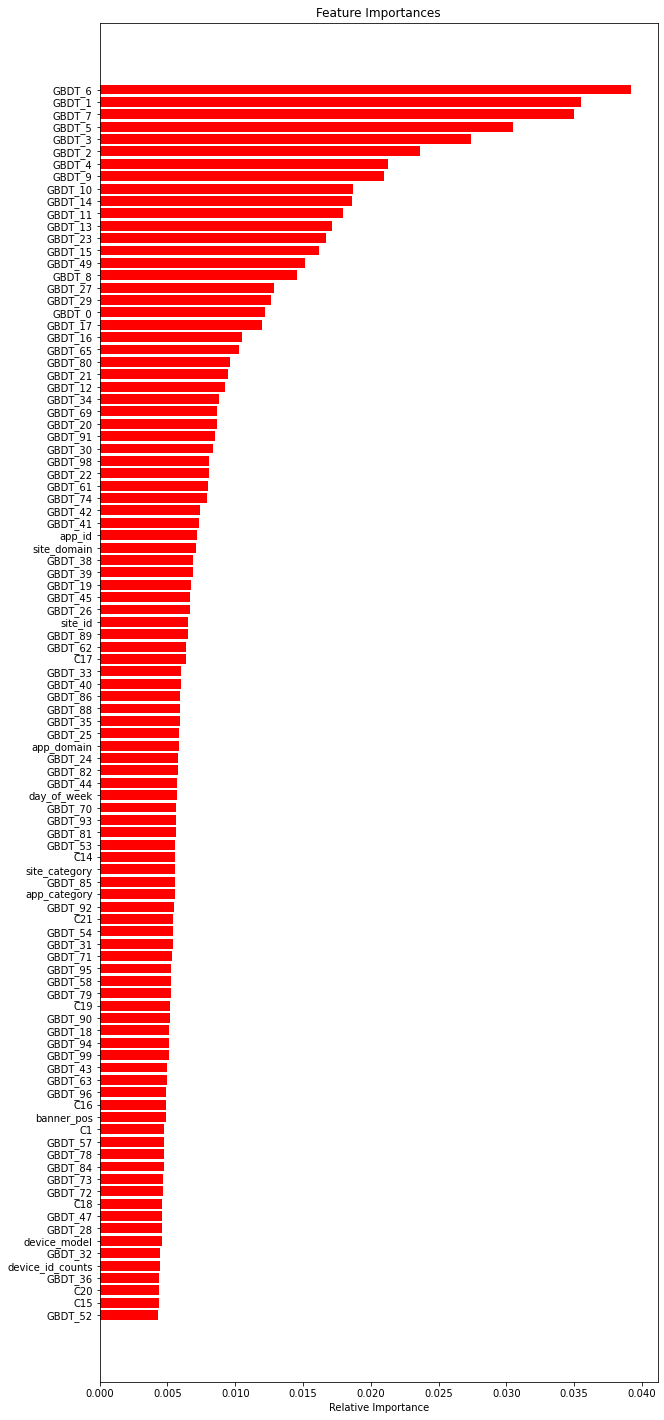

In [35]:
import numpy as np

features = X_train_pCTR.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-100:]
plt.figure(figsize=(10,25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##  4. Data pipeline 

### 4.1 Some pre-requisites variables

In [19]:
from tqdm import tqdm

#count the number of ads per device id
data_group_1=X_train[['device_id','id']].groupby(['device_id']).count()

#count the number of ads per device ip
data_group_2=X_train[['device_ip','id']].groupby(['device_ip']).count()

#count the number of users per unique hour of the day
data_group_3=X_train[['hour_of_day','device_ip']].groupby(['hour_of_day']).count()

#first encode all the features as CTR features
#store all the names of the features in a list
#Here we are not inclusing the device id and device ip because we already have engineered features device id count and device ip count with CTR values
feature_names=['site_id','site_domain','site_category','app_id','app_category','app_domain',\
                'device_model','device_type','device_conn_type','device_id_counts','device_ip_counts',\
                'banner_pos','C1','C14','C15','C16','C17','C18','C19','C20','C21',\
                'hour_of_day','day_of_week','hourly_user_count']

#Loop thorough each column of the original dataframe for encoding them
vocab_list=[]
mean_list=[]

for name in tqdm(feature_names):
    #first get the vocabulary dictionary and the mean CTR for use on unknown categories
    vocab,mean=response_fit(X_train,name) # fit has to happen only on train data

    #add the vocabulary and the means to the list
    vocab_list.append(vocab)
    mean_list.append(mean)


100%|██████████| 24/24 [00:05<00:00,  4.19it/s]


In [1]:
import pickle

#This is required for adding the feature "device_id_counts"
with open('data_group_1.pkl','rb') as f:
    data_group_1 = pickle.load(f)

#This is required for adding the feature "device_ip_counts"
with open('data_group_2.pkl','rb') as f:
    data_group_2 = pickle.load(f)

#This is required for adding the feature "hourly_user_count"
with open('data_group_3.pkl','rb') as f:
    data_group_3 = pickle.load(f)

#This is a list of dictionaries containing the feature names for CTR encoding
with open('vocab_list.pkl','rb') as f:
    vocab_list = pickle.load(f)

#This is the list of mean CTR values for encoding unknown feature values in the dataset
with open('mean_list.pkl','rb') as f:
    mean_list = pickle.load(f) 

In [46]:
#Save all the variables for later use
data_group_1.to_pickle('data_group_1.pkl')
data_group_2.to_pickle('data_group_2.pkl')
data_group_3.to_pickle('data_group_3.pkl')

with open('vocab_list.pkl', 'wb') as f:
    pickle.dump(vocab_list, f) 

with open('mean_list.pkl', 'wb') as f:
    pickle.dump(mean_list, f) 


### 4.2 Get the model for GBDT features and the best XGBoost model for prediction

In [25]:
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier as xgb
import warnings
warnings.filterwarnings("ignore")

#Here we are taking number of estimators as 100 and max depth as 5 as we have seen from the tuning of the GBDT in the above XGBoost model
gradient_boosting = GradientBoostingClassifier(n_estimators=100, max_depth=5)

#load the model from the disk
with open('Model_for_GBDT_features.pkl','rb') as f:
    gradient_boosting = pickle.load(f)
    
#initialize the model with best parameters
#model = xgb(objective='binary:logistic',verbosity=0,use_label_encoder=False,
                                #n_estimators=200,max_depth=10, learning_rate=0.01,colsample_bytree=0.1,subsample=0.5)

#load the model from the disk
with open('Best_XGB_model.pkl','rb') as f:
    model = pickle.load(f)

### 4.3 Data pipeline which takes raw features and predicts the output

In [20]:
def pipeline(df_test):
    
    #convert the date time in to the required format and then pass it to the data pipeline
    df_test['hour']=df_test.hour.apply(lambda val : datetime.strptime(str(val), '%y%m%d%H'))
    
    #prepare a submission dataframe
    submission_df=pd.DataFrame()
    submission_df['id']=df_test['id'].values
    
    #make a column with values with device id counts and add it to the dataframe
    count_feature=[]
    for index in df_test['device_id']:
        try:
            count_feature.append(data_group_1['id'][index])
        except:
            count_feature.append(1)
    df_test['device_id_counts']=count_feature
    
    #print the status to the screen
    print("Added device_id_counts feature to the dataframe..")
    
    #make a column with values with device ip counts and add it to the dataframe
    count_feature=[]
    for index in df_test['device_ip']:
        try:
            count_feature.append(data_group_2['id'][index])
        except:
            count_feature.append(1)
    df_test['device_ip_counts']=count_feature
    
    #print the status to the screen
    print("Added device_ip_counts feature to the dataframe..")
    
    #add hour_of_the_day as the new feature to our dataset
    df_test['hour_of_day'] = df_test['hour'].apply(lambda x: x.hour)
    
    #print the status to the screen
    print("Added hour_of_day feature to the dataframe..")
    
    #add day_of_week as the new feature to our dataset
    df_test['day_of_week'] = df_test['hour'].apply(lambda x: x.day_name())
    
    #print the status to the screen
    print("Added day_of_week feature to the dataframe..")
    
    #make a column with values with hourly user count and add it to the dataframe
    count_feature=[]
    for index in df_test['hour_of_day']:
        try:
            count_feature.append(data_group_3['device_ip'][index])
        except:
            count_feature.append(1)
    df_test['hourly_user_count']=count_feature
    
    #print the status to the screen
    print("Added hourly_user_count feature to the dataframe..")
    
    #Data frame to store only CTR encoded values
    submission_pCTR=pd.DataFrame()
    
    #first encode all the features as CTR features
    #store all the names of the features in a list
    #Here we are not inclusing the device id and device ip because we already have engineered features device id count and device ip count with CTR values
    feature_names=['site_id','site_domain','site_category','app_id','app_category','app_domain',\
                    'device_model','device_type','device_conn_type','device_id_counts','device_ip_counts',\
                    'banner_pos','C1','C14','C15','C16','C17','C18','C19','C20','C21',\
                    'hour_of_day','day_of_week','hourly_user_count']

    #Loop thorough each column of the dataframe for encoding them
    count=0
    for name in feature_names:
        # we use the vocab to response code the train and test data
        submission_pCTR[name] = response_transform(df_test[name],vocab_list[count],mean_list[count])
        count+=1
        
    #print the transform status to the screen
    print('\n Encoded the data with the train CTR values..')  
    
    #Now add the GBDT features to the given test dataframe
    df_test_GBDT_features = gradient_boosting.apply(submission_pCTR).astype('int32')
    
    #Here we need to reshape our array to a 2D array and then convert to a data frame to be used for modelling
    df_test_GBDT_features=df_test_GBDT_features.reshape(df_test.shape[0],100)
    
    #Add the GBDT features to the existing dataframe
    for i in range(100):
        submission_pCTR['GBDT_'+str(i)]=df_test_GBDT_features[:,i]
    
    #print the status to the screen
    print("\n Added the GBDT features to the test dataframe..")
    
    #Now predict the y-values with the best model
    df_y_pred=model.predict(submission_pCTR)
    df_y_prob=model.predict_proba(submission_pCTR)
    
    #Now add the y-labels to all the  dataframes that we have created
    submission_df['click']=df_y_prob[:,1]            #this contains only id and y-label probabilities
    df_test['click']=df_y_pred                  #this contains original dataframe passed and y-label
    submission_pCTR['click']=df_y_pred          #this contains the dataframe with new features and y-label
    
    #print the status to the screen
    print("\n Predicted the y_labels using the best model..")
    
    #finally return the submission dataframe
    return submission_df,submission_pCTR,df_test

we will read the given test csv file and then create a submission.csv file with the help of above defined function

In [26]:
#load the given kaggle test dataset which is without the class labels
import pandas as pd 

given_df=pd.read_csv('test.csv',dtype={'id':object})
given_df.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,10000554139829213984,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,10001094637809798845,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,10001377041558670745,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221


In [27]:
given_df.shape

(4577464, 23)

Get the prediction time for 4.7 million data points

In [28]:
#Get the prediction time for 4.7 million datapoints
import time
from  datetime import datetime

#Get the predictions on the given test data
start_time=time.time()
submission_df,submission_pCTR,df_test=pipeline(given_df)

#print the time taken to get the predictions on the given test dataset
print("\n Time taken for ",given_df.shape[0]," datapoints is ",time.time()-start_time," seconds")

#save the dataframes to the disk
submission_df.to_csv('submission_kaggle.csv',index=False)
submission_pCTR.to_csv('modified_kaggle_df_with_predictions.csv',index=False)
df_test.to_csv('original_kaggle_df_with_predictions.csv',index=False)

Added device_id_counts feature to the dataframe..
Added device_ip_counts feature to the dataframe..
Added hour_of_day feature to the dataframe..
Added day_of_week feature to the dataframe..
Added hourly_user_count feature to the dataframe..

 Encoded the data with the train CTR values..

 Added the GBDT features to the test dataframe..

 Predicted the y_labels using the best model..

 Time taken for  4577464  datapoints is  215.1817684173584  seconds


Get the prediction time for 1 data point

In [28]:
#load the given kaggle test dataset which is without the class labels
given_df=pd.read_csv('test.csv',nrows=10)
given_df.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,10000554139829213984,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,10001094637809798845,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,10001377041558670745,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221


In [29]:
import time
#Get the predictions on the given test data
start_time=time.time()
single_df,single_pCTR,single_test=pipeline(given_df[1:2])

#print the time taken to get the predictions on the given test dataset
print("\n Time taken for ",given_df[0:1].shape[0]," datapoints is ",time.time()-start_time," seconds")

Added device_id_counts feature to the dataframe..
Added device_ip_counts feature to the dataframe..
Added hour_of_day feature to the dataframe..
Added day_of_week feature to the dataframe..
Added hourly_user_count feature to the dataframe..

 Encoded the data with the train CTR values..

 Added the GBDT features to the test dataframe..

 Predicted the y_labels using the best model..

 Time taken for  1  datapoints is  0.08300948143005371  seconds


##  5. Conclusions

* Here looking at the feature importances , we can see that GBDT features definetely played a very important role in classification of the data points and along with them there are some of our engineered features like day of the week and device id counts also played a signinficant role along with many of the anonymized categorical features such as C17 etc.
* We can see that apart from GBDT features , app id and site domain seems to have contributed most among the originally given features.
* So we can conclude that by engineering 7 different types of new features , we are able to get one of the least log-losses 0.39065 on the test data even though we are not able to get significant improvement in the confusion matrix values. <br> 
-------------x----------------x------------------x-----------------x-----------------------x----------------------x-----------------------x--------------------x----------------<br>
* Here we have got a test log-loss of 0.39065 which is a very good loss which is equivalent to score of the 160 to 170th position in the public leaderboard of the kaggle.
* The actual dataset given by the kaggle is of 50 million datapoints but we have taken a 5 million data points and trained our model due to the resource constraints and the test data given the kaggle itself is close to 5 million data points , so we cannot predict on this dataset using the current model because there will be a lot of unseen data points for which will not be able to predict correctly.

## 6. Procedure and observations

### 6.1 Procedure


<p> <b>1.</b> We have picked 5 million data points in a uniform random fashion from the huge dataset of 50 million data points that is given.<br><br>
<b>2.</b> We have analyzed each feature wrt the given class label by computing the per category CTR of the given features as all are categorical features.<br><br>
<b>3.</b> Based on the analysis we have engineered additional features which are very useful in prediction, they are described as follows:<br>
 <b>3.1 device_id_counts </b> - We have seen that counts of the impressions per device id shows a nice variation of per category CTR so we have added that as a feature.<br>
<b>3.2 device_ip_counts </b> - We have seen that counts of the impressions per device ip shows a nice variation of per category CTR so we have added that as a feature.<br>
 <b>3.3 hour_of_the_day </b> - We have seen that CTR shows a nice trend as the hour of the day changes throughout the day so we have added that as a feature.<br>
 <b>3.4 day_of_the_week </b> - We have seen that CTR changes wrt the day of the week during the EDA so we have added that as a feature.<br>
 <b>3.5 hourly_user_count </b> - We have seen that number of users are increasing depending on the hour of the day and peak at the noon and when we compute the CTR per count of the users per hour we got a nice trend ,so we have added that as a feature.<br>
 <b>3.6 GBDT features </b> - We have trained a GBDT on the train data encoded with the help of CTR values itself and taken the leaf node number where the data point falls in to while prediction and taken that as the feature , as we have 100 trees as base learners , so we will have 100 features for each data point <br><br>
<b>4. </b> As all the features are categorical in nature ,we label encoded them , but as we already have CTR per category with us , it would act as a nice proxy for label encoding and we get only 1 column of numerical data for each feature, so we have directly taken the CTR values which we have computed along with the GBDT features for prediction by the models.<br><br>
<b>5.</b> Here we have tried various models without the GBDT features and then with GBDT features so that we can see the progressive improvement in the log-loss which we use as the scoring function for this problem. The summary about all the models is given below.
<br>
</p> 


### 6.2 Summary of modelling

In [4]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model Comparision "
ptable.field_names = ["Model",'Features','log loss']
ptable.add_row(["Random model","original features + 5 engineered features","0.88575"])
ptable.add_row(["--------------------------------------------------------","---------------------------------------------------------------","--------"])
ptable.add_row(["Logistic regression with hyper-parameter tuning ","original features + 5 engineered features","0.40037"])
ptable.add_row(["XG_Boost with hyper-parameter tuning","original features + 5 engineered features","0.39457"])
ptable.add_row(["Field Oriented Factorization Machines \n with hyper-parameter tuning","original features + 5 engineered features","0.40614"])
ptable.add_row(["--------------------------------------------------------","----------------------------------------------------------------","--------"])
ptable.add_row(["Logistic regression with hyper-parameter tuning","original features + 5 engineered features + GBDT features","0.39660"])
ptable.add_row(["XG_Boost with hyper-parameter tuning of 2 parameters","original features + 5 engineered features + GBDT features","0.39366"])
ptable.add_row(["XG_Boost with hyper-parameter tuning of 4 parameters","original features + 5 engineered features + GBDT features","0.39065"])
print(ptable)

+----------------------------------------------------------------------------------------------------------------------------------------+
|                                                           Model Comparision                                                            |
+----------------------------------------------------------+------------------------------------------------------------------+----------+
|                          Model                           |                             Features                             | log loss |
+----------------------------------------------------------+------------------------------------------------------------------+----------+
|                       Random model                       |            original features + 5 engineered features             | 0.88575  |
| -------------------------------------------------------- | ---------------------------------------------------------------  | -------- |
|     Logistic regression w

### 6.3 Final observations

* The final log-loss could be further improved with the help of more complex ensembles but the increment is very marginal and the winner solution has a log-loss of close to 0.38 which is not a very further from our solution but the precision and recall values will have not more than some marginal improvement which is not very practical for real world solution.
* The models used in this case study are chosen keeping in mind the low latency requirment of the industry, so we have measured the time taken for the final prediction with the tuned GBDT model on the new data point which is 0.083 seconds ~  83 milli seconds which is very practical in the fast paced real world to determine whether the given ad will be clicked or not.